In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 6)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [44]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from nltk.tokenize import sent_tokenize
from sklearn.preprocessing import LabelEncoder

In [45]:
data = pd.read_csv('/content/blogs.csv')
data.head(10)

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
5,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,alt.atheism
6,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
7,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
8,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,alt.atheism
9,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism


In [46]:
data['Data'][1]


'Newsgroups: alt.atheism\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!moe.ksu.ksu.edu!osuunx.ucc.okstate.edu!constellation!darkside!okcforum.osrhe.edu!bil\nFrom: bil@okcforum.osrhe.edu (Bill Conner)\nSubject: Re: Not the Omni!\nMessage-ID: <C4vznz.JM4@darkside.osrhe.uoknor.edu>\nSender: news@darkside.osrhe.uoknor.edu\nNntp-Posting-Host: okcforum.osrhe.edu\nOrganization: Okcforum Unix Users Group\nX-Newsreader: TIN [version 1.1 PL6]\nReferences: <65785@mimsy.umd.edu>\nDate: Sat, 3 Apr 1993 02:45:35 GMT\nLines: 18\n\nCharley Wingate (mangoe@cs.umd.edu) wrote:\n: \n: >> Please enlighten me.  How is omnipotence contradictory?\n: \n: >By definition, all that can occur in the universe is governed by the rules\n: >of nature. Thus god cannot break them. Anything that god does must be allowed\n: >in the rules somewhere. Therefore, omnipotence CANNOT exist! It contradicts\n: >the rules of nature.\n: \n:

In [47]:
data

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [48]:
data.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,alt.atheism
freq,1,100


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [50]:
data.duplicated().sum()

np.int64(0)

In [51]:
data.drop_duplicates(inplace=True)

In [52]:
data

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [53]:
data.isnull().sum()

,0
Data,0
Labels,0


In [54]:
data['Labels'].unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

<Axes: xlabel='Labels'>

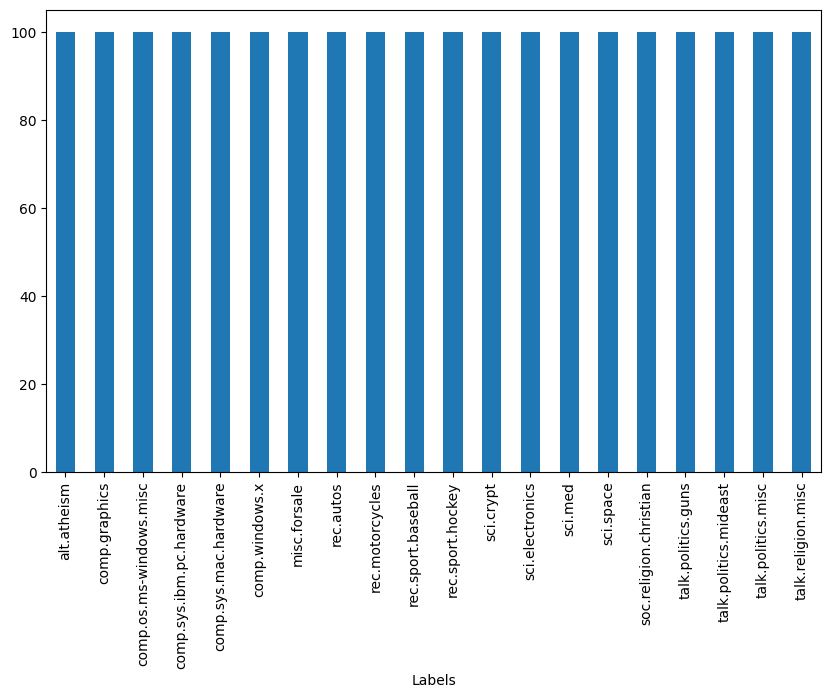

In [55]:
data['Labels'].value_counts().plot(kind='bar')

In [56]:
le = LabelEncoder()
data['encode_labels'] = le.fit_transform(data['Labels'])
data

,Data,Labels,encode_labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,0
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,19
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,19
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19


In [57]:
lemma = WordNetLemmatizer()

In [58]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional but helps


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
corpus = []
stop_words = stopwords.words('english')
for i in range(len(data)):
    msg = re.sub('[^a-zA-Z]',' ',data['Data'][i])
    msg = msg.lower()
    msg = msg.split()
    msg = [lemma.lemmatize(i) for i in msg if i not in stop_words]
    msg = ' '.join(msg)
    corpus.append(msg)
corpus


In [ ]:
tf = TfidfVectorizer(stop_words='english', max_features=None)
x_data = tf.fit(corpus).transform(corpus).toarray()


In [ ]:
data.columns

In [ ]:
y = data['encode_labels']

In [ ]:
x_train, x_test, y_train, y_test =  train_test_split(x_data, y, test_size = 0.2, random_state = 7)

In [ ]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
ypred = nb.predict(x_test)

print("Train Accuracy:", accuracy_score(y_train, nb.predict(x_train)))
print("Test Accuracy:", accuracy_score(y_test, ypred))


In [ ]:
print(classification_report(y_test, ypred))

In [ ]:
from textblob import TextBlob
data['Polarity'] = data['Data'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['Sentiment'] = data['Polarity'].map(
    lambda p: 'Positive' if p > 0 else ('Negative' if p < 0 else 'Neutral')
)

print(data[['Labels', 'Sentiment']])
